In [11]:
import nptsne
import numpy as np
from nptsne import hsne_analysis

In [2]:

X = np.load("C:\\Users\\alexa\\Desktop\\Thumos14\\features_test_set.npy")
#add the labels here
print(f'Size data: {X.shape}')
hsne = nptsne.HSne(True)
hsne.create_hsne(X, 3)
print(f'Num scales: {hsne.num_scales} Num points {hsne.num_data_points}')

Size data: (337180, 2048)
Num scales: 3 Num points 337180


In [3]:
scale2 = hsne.get_scale(2)
print(f'Num points in scale 2 {scale2.num_points}')

Num points in scale 2 9154


In [12]:
top_analysis = nptsne.hsne_analysis.Analysis(hsne,nptsne.hsne_analysis.EmbedderType.GPU)

In [21]:
for i in range(1000):
    top_analysis.do_iteration()

In [17]:
print(top_analysis.embedding)

[[ -9.206661  -28.219822 ]
 [ -9.19858   -28.214933 ]
 [ -9.254287  -28.245502 ]
 ...
 [ -2.9978356 -18.138445 ]
 [ -2.997425  -18.137981 ]
 [ -2.9963312 -18.13526  ]]


In [18]:
print(top_analysis.embedding.shape)

(9154, 2)


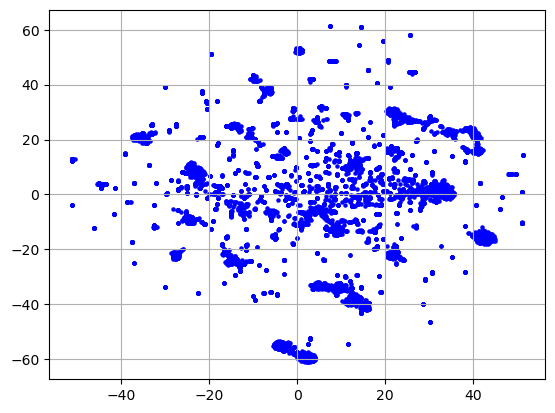

In [22]:
import matplotlib.pyplot as plt
x_coords = [point[0] for point in top_analysis.embedding]
y_coords = [point[1] for point in top_analysis.embedding]

# Create scatter plot
plt.scatter(x_coords, y_coords, s=5, color='blue')

plt.grid(True)  # Enable grid
plt.show()


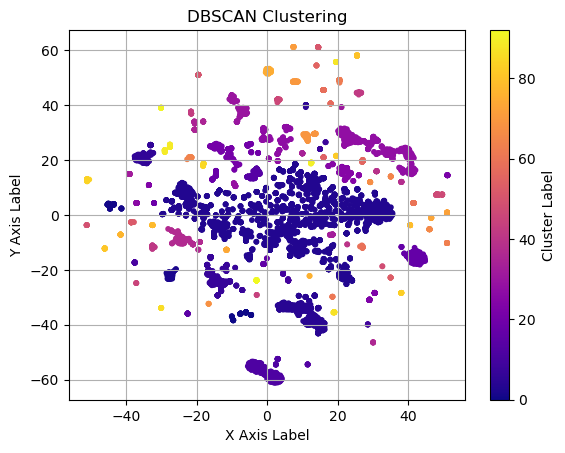

In [65]:
from sklearn.cluster import DBSCAN, OPTICS, HDBSCAN
points = top_analysis.embedding
dbscan = DBSCAN(eps=3, min_samples=2)  # Adjust parameters as needed
dbscan.fit(points)
optics = OPTICS(min_samples=200)
optics.fit(points)
hdb = HDBSCAN(min_cluster_size=150)
hdb.fit(points)

# Retrieve cluster labels
cluster_labels_dbscan = dbscan.labels_
cluster_labels_optics = optics.labels_ 
cluster_labels_hdb = hdb.labels_

plt.scatter(points[:, 0], points[:, 1], c=cluster_labels_dbscan, cmap='plasma', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [20]:
hsne.save("save_test.hsne")
